In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
files = ['circuits.csv','drivers.csv', 'driver_standings.csv', 'races.csv', 'results.csv', 'status.csv']

data_frames = []

for file in files:
    data_frames.append(pd.read_csv(file))

files

['circuits.csv',
 'drivers.csv',
 'driver_standings.csv',
 'races.csv',
 'results.csv',
 'status.csv']

In [3]:
circuits = pd.read_csv('circuits.csv')
drivers = pd.read_csv('drivers.csv')
driver_standings = pd.read_csv('driver_standings.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')


# Czyszczenie danych

In [4]:
circuits.drop(columns=['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt'], inplace=True)
circuits

,circuitId,name
0,1,Albert Park Grand Prix Circuit
1,2,Sepang International Circuit
2,3,Bahrain International Circuit
3,4,Circuit de Barcelona-Catalunya
4,5,Istanbul Park
...,...,...
72,75,Autódromo Internacional do Algarve
73,76,Autodromo Internazionale del Mugello
74,77,Jeddah Corniche Circuit
75,78,Losail International Circuit


In [5]:
drivers.drop(columns=['url', 'code'], inplace=True)
drivers

,driverId,driverRef,number,forename,surname,dob,nationality
0,1,hamilton,44,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,Mick,Schumacher,1999-03-22,German
853,855,zhou,24,Guanyu,Zhou,1999-05-30,Chinese
854,856,de_vries,45,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,81,Oscar,Piastri,2001-04-06,Australian


# EDA - podstawowe statystyki

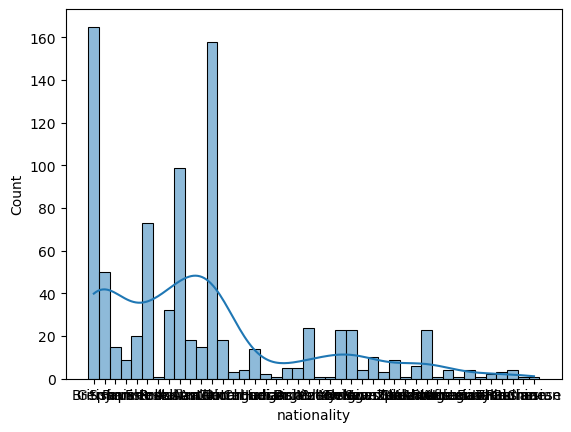

In [13]:
# wizualizacja rozkładu kolumny 'lat'
sns.histplot(drivers['nationality'], kde=True)
plt.show()

In [12]:
drivers['nationality'].value_counts().head(10)


British          165
American         158
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Belgian           23
Swiss             23
South African     23
Name: nationality, dtype: int64

In [16]:
races.drop(columns=['url', 'time', 'fp1_date', 'fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date',
                    'quali_time','sprint_date','sprint_time'], inplace=True)
races

KeyError: "['url', 'time', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'] not found in axis"

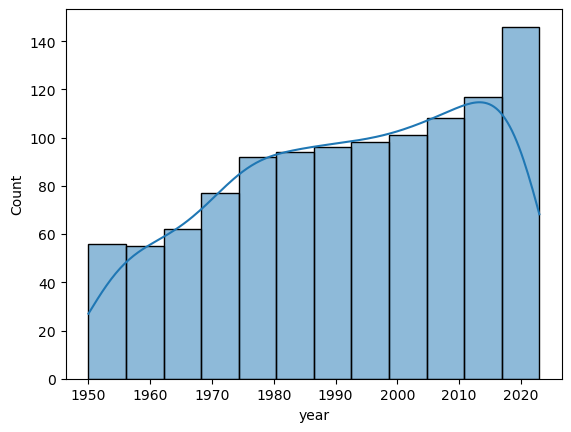

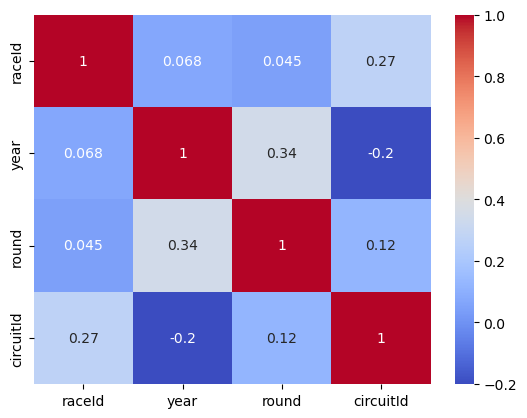

In [14]:
# wizualizacja rozkładu kolumny 'lat'
sns.histplot(races['year'], kde=True)
plt.show()

# wyświetlenie macierzy korelacji między zmiennymi
sns.heatmap(races.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
results.drop(columns=['fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed'], inplace=True)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,130


In [20]:
results['positionText'].value_counts().head(10)

R    8805
F    1368
3    1089
4    1089
2    1087
5    1085
1    1082
6    1078
7    1058
8    1030
Name: positionText, dtype: int64

In [26]:
merged_df = pd.merge(status, results, on='statusId')
merged_df

,statusId,status,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds
0,1,Finished,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616
1,1,Finished,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094
2,1,Finished,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779
3,1,Finished,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797
4,1,Finished,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,139,Illness,24883,1043,825,210,20,17,\N,R,18,0.0,47,\N,\N
25836,139,Illness,25405,1073,853,210,9,20,\N,W,20,0.0,0,\N,\N
25837,140,Undertray,25624,1084,849,3,6,17,\N,R,19,0.0,48,\N,\N
25838,140,Undertray,25645,1085,852,213,22,8,\N,R,20,0.0,17,\N,\N


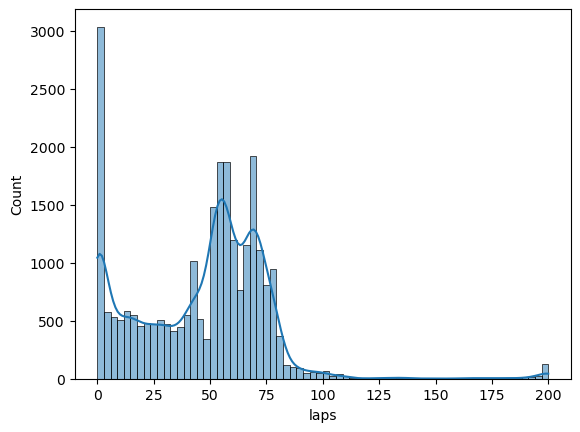

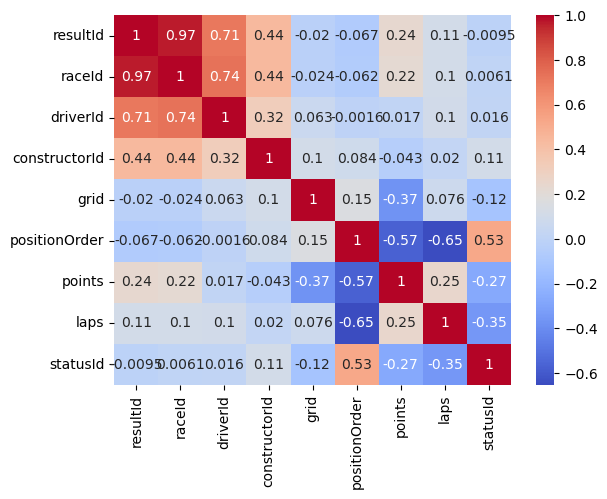

In [27]:
# wizualizacja rozkładu kolumny 'lat'
sns.histplot(results['laps'], kde=True)
plt.show()

# wyświetlenie macierzy korelacji między zmiennymi
sns.heatmap(results.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
merged_df['status'].value_counts().nlargest(10)


Finished           7083
+1 Lap             3850
Engine             2011
+2 Laps            1593
Accident           1044
Did not qualify    1025
Collision           833
Gearbox             805
Spun off            792
+3 Laps             731
Name: status, dtype: int64

In [22]:

circuits_info = circuits.info()
drivers_info = drivers.info()
driver_stnd_info = driver_standings.info()
races_info = races.info()
results_info = results.info()
status_info = status.info()

# łączenie wyników
result_info = pd.concat([circuits_info, drivers_info, driver_stnd_info, races_info, results_info, status_info]) 

# wyświetlenie wyników
result_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    o

ValueError: All objects passed were None

In [21]:
circuits_dscr = circuits.describe()
drivers_dscr = drivers.describe()
driver_stnd_dscr = driver_standings.describe()
races_dscr = races.describe()
results_dscr = results.describe()
status_dscr = status.describe()

result_describe = pd.concat([circuits_dscr, drivers_dscr, driver_stnd_dscr, races_dscr, results_dscr, status_dscr])

result_describe


,circuitId,lat,lng,driverId,driverStandingsId,raceId,points,position,wins,year,round,resultId,constructorId,grid,positionOrder,laps,statusId
count,77.000000,77.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.883117,33.442925,1.076683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,23.001701,22.808866,65.516951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-37.849700,-118.189000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20.000000,32.777400,-9.394170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,40.000000,40.951700,3.930830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,59.000000,46.958900,19.248600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,80.000000,57.265300,144.968000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,NaN,NaN,NaN,857.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,429.057176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# lista plików w folderze z danymi
files = os.listdir(data_path)

# iteracja po każdym pliku, łączenie i czyszczenie danych
dfs = []
for file in files:
    if file.endswith('.csv'): # tylko pliki CSV
        df = pd.read_csv(os.path.join(data_path, file))
        dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True) # usuwanie duplikatów
merged_df.dropna(inplace=True) # usuwanie brakujących wartości
merged_df.drop(columns=['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt', 'code', 'time',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed' ], inplace=True) # usuwanie niepotrzebnych kolumn


# lista plików w folderze z danymi
files = os.listdir(data)

# iteracja po każdym pliku i czyszczenie danych
for file in files:
    if file.endswith('.csv'): # tylko pliki CSV
        df = pd.read_csv(os.path.join(data, file))
        
        df.drop_duplicates(inplace=True) # usuwanie duplikatów
        df.dropna(inplace=True) # usuwanie brakujących wartości
        df.drop(columns=['url'], inplace=True) # usuwanie kolumny z linkami do wikipedii

        output_file = os.path.join(data, 'cleaned_' + file)  # zapisanie zmodyfikowanej ramki do pliku
        df.to_csv(output_file, index=False)